8次递归下降后w的取值为：
[[-0.01575014]
 [ 0.03398042]
 [ 0.06377558]
 [ 0.0559112 ]
 [ 0.13364944]
 [ 0.07486666]
 [ 0.06124735]
 [ 0.44089995]
 [ 0.28302572]
 [ 0.05677651]
 [ 0.02163603]
 [ 0.01852186]
 [ 0.01084468]
 [ 0.03272613]
 [-0.02267172]]

训练集第 1 次误差： 858.638201616
训练集第 2 次误差： 793.287720802
训练集第 3 次误差： 727.948555599
训练集第 4 次误差： 662.620704047
训练集第 5 次误差： 597.304164187
训练集第 6 次误差： 533.674908576
训练集第 7 次误差： 488.933069511
训练集第 8 次误差： 457.341901672

测试集第 1 次误差： 422.268962671
测试集第 2 次误差： 388.546504319
测试集第 3 次误差： 354.83262322
测试集第 4 次误差： 321.127317653
测试集第 5 次误差： 287.430585895
测试集第 6 次误差： 254.326402646
测试集第 7 次误差： 231.763503337
测试集第 8 次误差： 219.909188864

训练集命中率： 0.8528138528138528
测试集命中率： 0.8552631578947368


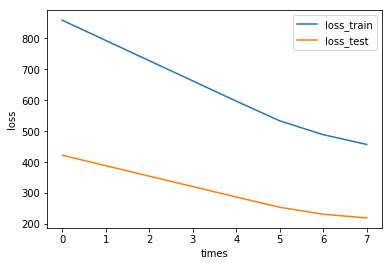

In [65]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import numpy.linalg as nl
import matplotlib.pyplot as plt
%matplotlib inline


X,Y = load_svmlight_file("Desktop//australian_scale.txt")

row=X.shape[0]
B = np.mat(np.ones((X.shape[0],1)))
X=np.mat(np.c_[X.A,B])
Y=Y.reshape(len(Y),-1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

#初始化全零
W=np.mat(np.zeros((15,1)))
learning_rate=0.04
C=2

#迭代次数
num=8
#阀值
threshold=0.0

loss_train=[]
loss_test=[]

#目标函数
def score(w,x):
    return x*w

#loss函数
def loss(y,w,C,x):
    temp=0
    for i in range(len(y)):
        temp+=max(1-y[i,0]*score(w,x[i]),0)
    return 0.5*w.T.dot(w)+C*temp

#求梯度
def gradient(x,y,w):
    temp=w.T
    for i in range(len(x)):
        if (1-y[i,0]*score(w,x_train[i])>=0):
            temp=temp-(y[i]*x[i])*C
    return temp.T/x_train.shape[0]

#梯度下降
def gradient_descent(w):
    temp_w=w-learning_rate*gradient(x_train,y_train,w)
    return temp_w

#优化
def optimizer(w):
    temp_w=w
    for i in range(num):
        temp_w=gradient_descent(temp_w)
        loss_train.append(loss(y_train,temp_w,C,x_train)[0,0])
        loss_test.append(loss(y_test,temp_w,C,x_test)[0,0])
    return  temp_w



def main():
    w=optimizer(W)
    print("8次递归下降后w的取值为：")
    print(w)
    print()
    for i in range(num):
         print("训练集第",i+1,"次误差：",loss_train[i])
    print()
    for i in range(num):
         print("测试集第",i+1,"次误差：",loss_test[i])
    print()
    #训练集命中率
    train_hit=0
    for i in range(len(x_train)):
        if (score(w,x_train[i]) >= threshold and y_train[i] == 1) or (score(w,x_train[i]) < threshold and y_train[i] == -1):
            train_hit += 1

    #验证集命中率
    test_hit=0
    for i in range(len(x_test)):
        if (score(w,x_test[i]) >= threshold and y_test[i] == 1) or (score(w,x_test[i]) < threshold and y_test[i] == -1):
            test_hit += 1

    print("训练集命中率：",train_hit/len(x_train))
    print("测试集命中率：",test_hit/len(x_test))
    n = np.arange(num)
    plt.plot(n,loss_train,label='loss_train')
    plt.plot(n,loss_test,label='loss_test')
    plt.legend(loc='upper right')
    plt.xlabel('times')
    plt.ylabel('loss')

main()

